In [1]:
# Feature Selection 
# : 가장 좋은 성능을 보여줄 수 있는 데이터의 부분 집합(Subset)을 찾아내는 방법
# : 모델 생성에 밀접한 데이터의 부분 집합을 선택하여 연산 효율성 및 모델 성능을 확보

# 목적 및 필요성
# 연산 효율성 
# : 특징 생성과는 다르게 원 데이터 공간 내 유의미한 특징을 선택하는 기법으로 연산 효율 및 적절한 특징을 찾기 위해 수행 

# : 원본 데이터에서 가장 유용한 특징만을 선택하여 간단한 모델 구성 및 성능을 확보하고자 하는 것이 주요 목적 

# 특징 선택 방안
# : Filter
# 특징들에 대한 통계적 점수를 부여하여 순위를 매기고 선택하는 방법론

# 실행 속도가 빠르다는 측면에서 시간 및 비용 측면의 장점을 보임 

# 래퍼 (Wrapper)
# : 특징들의 조합을 지도학습 기반 알고리즘에 반복적으로 적용하여 특징을 선택하는 방법론
# : 최적의 데이터 조합을 찾기 때문에 성능 관점상 유용하나 시간과 비용 크게 발생 

# 임베디드 (Embedded) 
# : 모델 정확도에 기여하는 특징들을 선택하는 방법으로 Filter와 Wrapper의 장점을 결합한 방법
# : 모델의 학습 및 생성과정에서 최적의 특징을 선택하는 방법

In [2]:
# Filter 방식 
# : 특징들에 대한 통계적 기법 기반의 점수 및 순위 부여하여 선택 
# 카이제곱 필터 ( Chi-square filter ) 
# 범주형인 독립 및 종속 변수 간의 유의미성을 도출하기 위한 통계적 방안
# 연속형 변수를 이산화(범주)를 하여 활용 가능 

# 상관관계 필터 (Correlation filter) 
# : 연속형인 독립 및 종속변수 간 유의미성을 도출하기 위한 통계적 방안
# : 보통 임계치 (threshold) 설정하여 변수 선택 

In [3]:
# Wrapper 방식
# : 원본 데이터 내 변수 간 조합을 탐색하여 특징 선택 
# : 반복적 특징 조합 탐색 
# : 원본 데이터셋 내 변수들의 다양한 조합을 모델에 적용하는 방식
# : 최적의 부분 데이터집합을 도출하는 방법론
# : 대표적 방식으로 재귀적 특정 제거 존재 

In [4]:
# Embedded 방식
# : 모델을 학습하여 정확도에 기여하는 특징을 선택하는 방안
# : 알고리즘 내 자체 내장 함수로 특징을 선택하는 방식으로, 모델 성능에 기여하는 특징을 도출 
# : 모든 조합을 고려하고 결과를 도출하는 Wrapper와 달리 학습과정에서 최적화된 변수를 선택 
# : 트리 계열 모델 기반의 특징 선택이 대표적 
# (랜덤포레스트 기반 Feature Importance 기반) 

In [5]:
# 랜덤포레스트 모형 기반의 알고리즘 
# : 보루타 알고리즘 ( Boruta Algorithm )
# Boruta Algorithm 은 기존 데이터 임의로 복제하여 랜덤 변수 (Shadow) 생성하고 원 자료와 결합하여 랜덤포레스트 모형에 적용
# shadow 보다 중요도가 낮을 경우 중요하지 않은 변수로 판단 후 제거 

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Breast Cancer 데이터 활용 깁나 실습
# 데이터 로딩 
cancer = pd.read_csv("./data/wdbc.data", header = None)

# 데이터 컬럼명 지정 
cancer.columns = ["id", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", 
                  "concave_poins_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se",
                  "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se", 
                  "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst",
                  "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"]

# ID를 Index 화
cancer = cancer.set_index('id')
cancer

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_poins_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( cancer.drop(['diagnosis'], axis = 1) , cancer[['diagnosis']],
random_state = 1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [4]:
train_df = pd.merge(X_train, y_train, left_index = True, right_index = True, how = 'inner')
train_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_poins_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
925622,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.094290,0.2128,0.07152,...,42.79,128.70,915.0,0.14170,0.79170,1.17000,0.23560,0.4089,0.14090,M
8915,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.048190,0.1879,0.05852,...,26.19,109.10,809.8,0.13130,0.30300,0.18040,0.14890,0.2962,0.08472,B
848406,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.052590,0.1586,0.05922,...,30.88,123.40,1138.0,0.14640,0.18710,0.29140,0.16090,0.3029,0.08216,M
922577,10.32,16.35,65.31,324.9,0.09434,0.04994,0.01012,0.005495,0.1885,0.06201,...,21.77,71.12,384.9,0.12850,0.08842,0.04384,0.02381,0.2681,0.07399,B
891703,11.85,17.46,75.54,432.7,0.08372,0.05642,0.02688,0.022800,0.1875,0.05715,...,25.75,84.35,517.8,0.13690,0.17580,0.13160,0.09140,0.3101,0.07007,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866674,19.79,25.12,130.40,1192.0,0.10150,0.15890,0.25450,0.114900,0.2202,0.06113,...,33.58,148.70,1589.0,0.12750,0.38610,0.56730,0.17320,0.3305,0.08465,M
869254,10.75,14.97,68.26,355.3,0.07793,0.05139,0.02251,0.007875,0.1399,0.05688,...,20.72,77.79,441.2,0.10760,0.12230,0.09755,0.03413,0.2300,0.06769,B
859717,17.20,24.52,114.20,929.4,0.10710,0.18300,0.16920,0.079440,0.1927,0.06487,...,33.82,151.60,1681.0,0.15850,0.73940,0.65660,0.18990,0.3313,0.13390,M


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

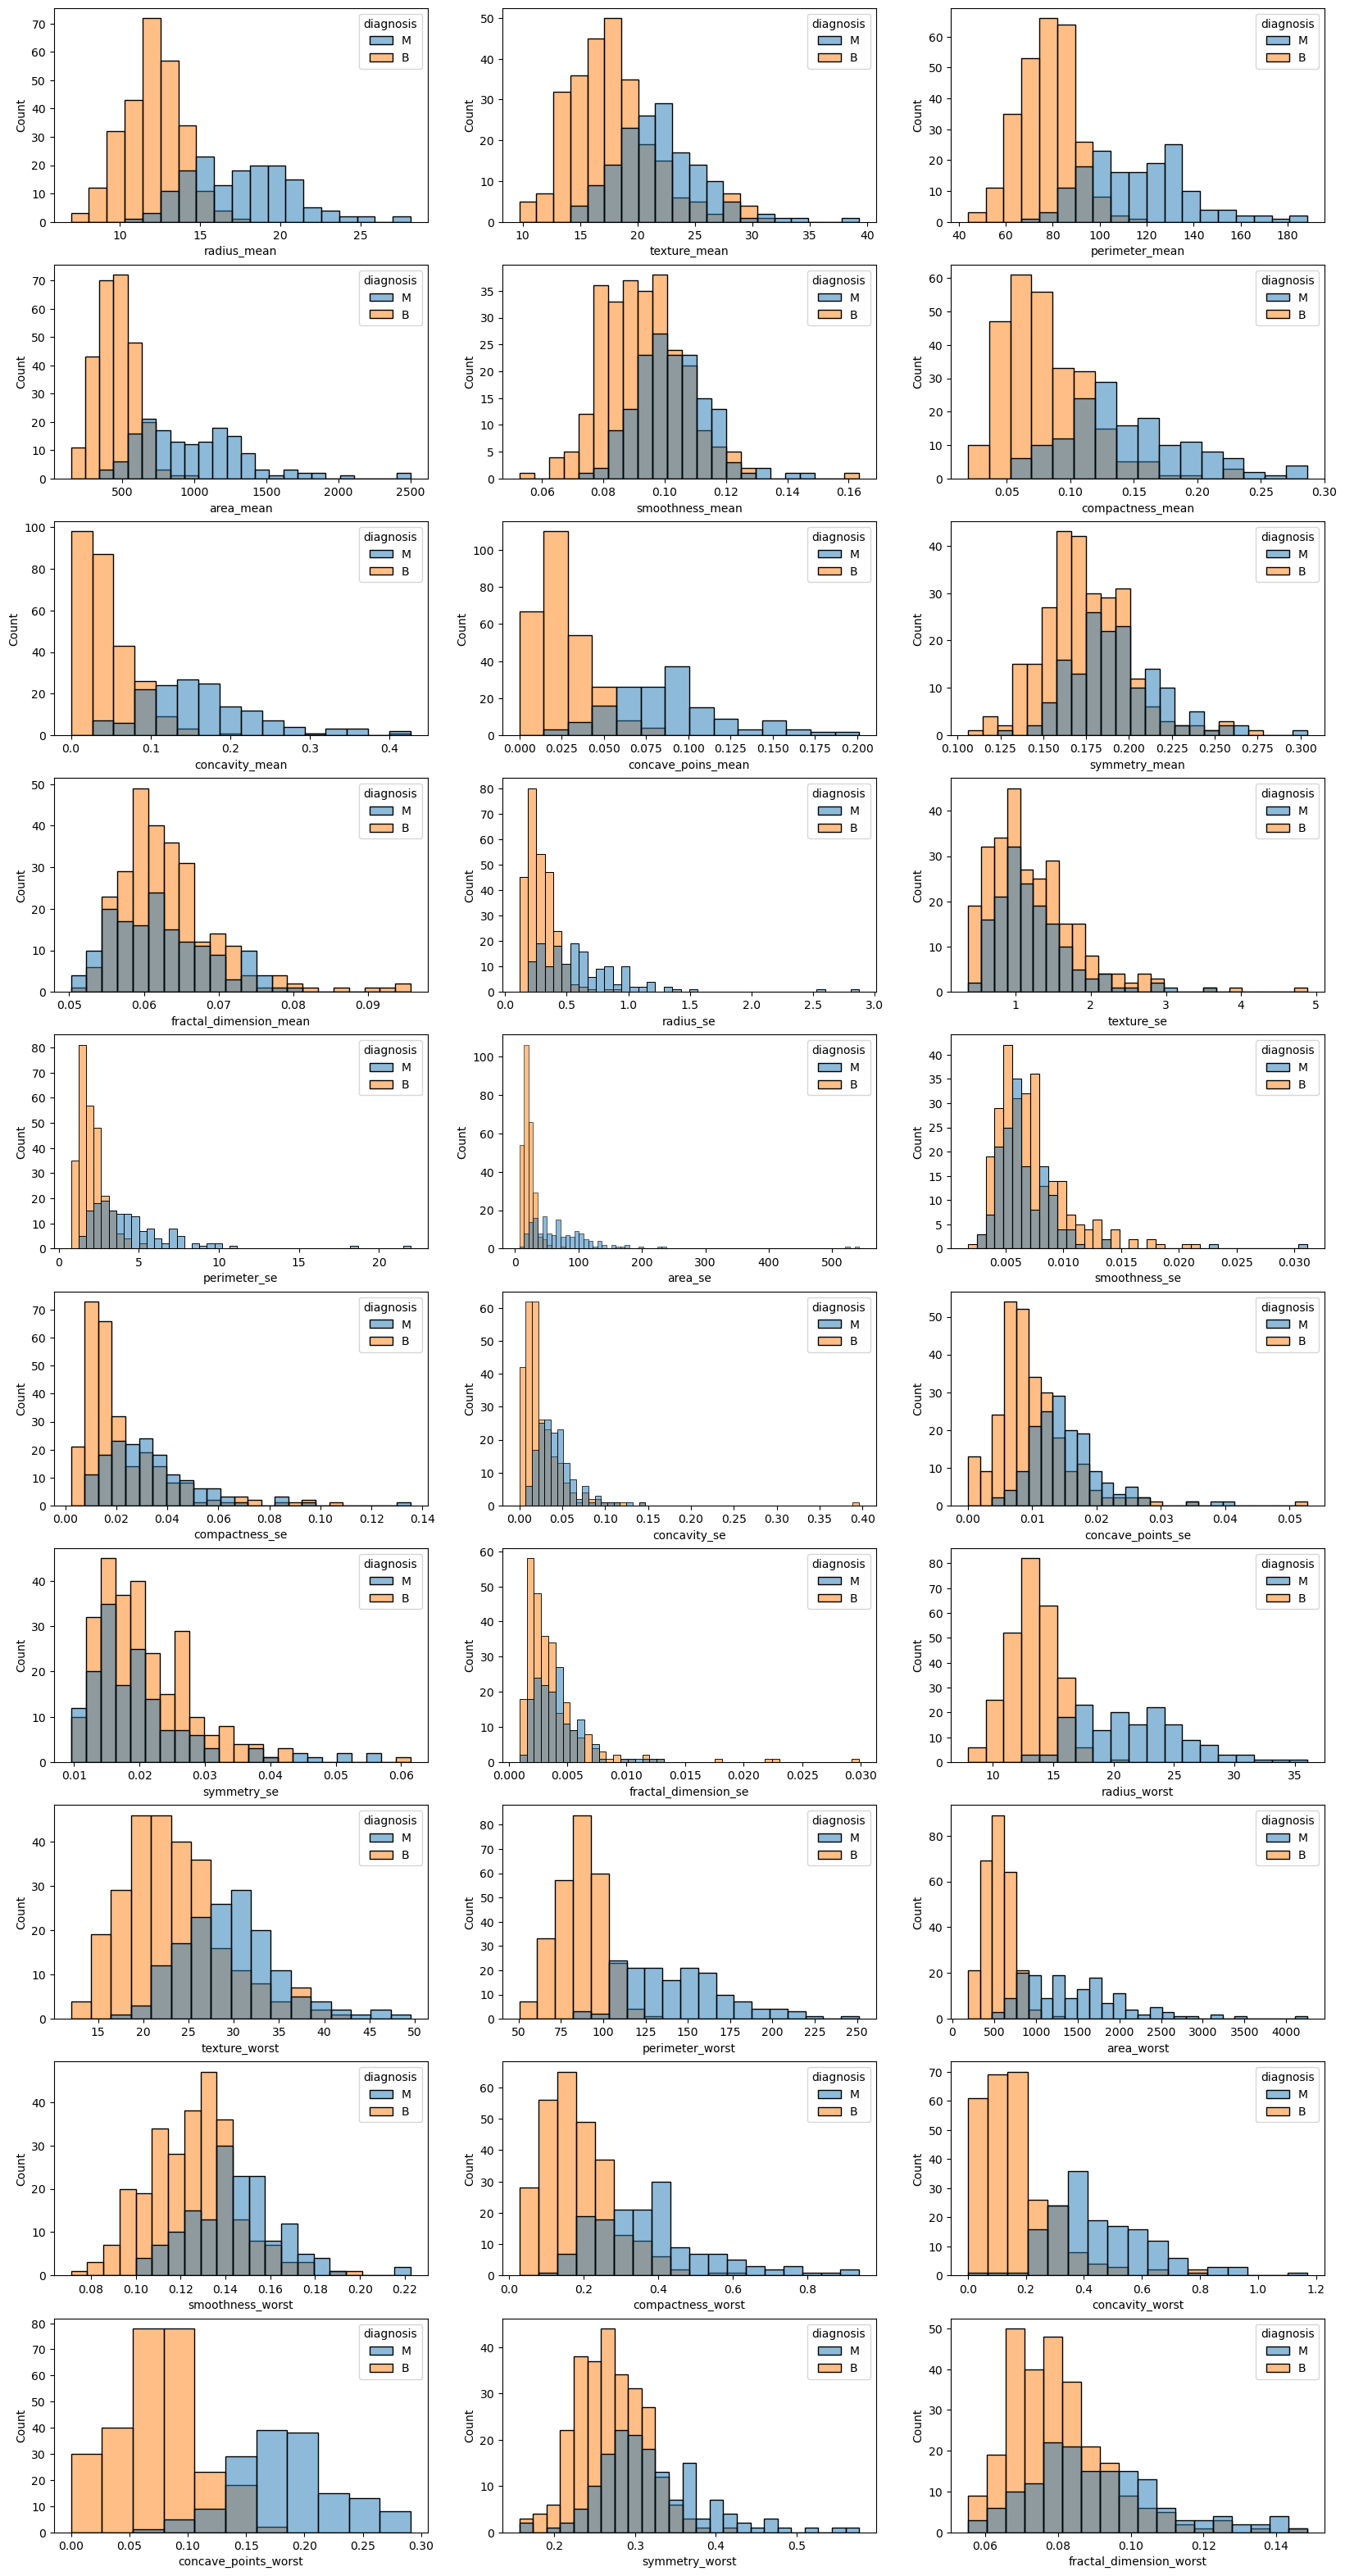

In [6]:
fig, axes = plt.subplots(10, 3, figsize = (20,40))
axes = axes.flatten()

for i in range(30) : 
    sns.histplot(data = train_df, x = train_df.columns[i], hue = "diagnosis", multiple = "layer", ax = axes[i])

#plt.show()

In [35]:
# 유의할 것이라고 예상되는 변수 
# radius_mean, perimeter_mean, area_mean, concave_point_mean, radius_worst, perimeter_worst, area_worst, concave_point_worst 등 

In [7]:
# RFE 기반 주요 특징 선택 => wrapper
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

In [8]:
# SVM 기반 RFE 수행 
from sklearn.preprocessing import StandardScaler
#스케일에 민감한 SVM의 특징에 따라 변수의 scaling을 따로 진행 

scaler = StandardScaler()
scaler.fit(X_train)
scale_X_train = scaler.transform(X_train)

In [9]:
# RFE 를 적용할 모델 SVM 지정
estimator_mdl = SVC(kernel = "linear")
# SVM 학습 기반의 RFE 실행 및 유의미한 개수 지정 : 5개 
svm_rfe = RFE(estimator = estimator_mdl, n_features_to_select = 5)

svm_rfe_rst = svm_rfe.fit(scale_X_train, y_train.values.ravel())
svm_rfe_rst.ranking_
# 1로 나온 변수가 최종 유의미한 특징으로 도출된 컬럼

array([17, 23, 11, 16, 20, 25, 14,  9, 21, 13, 12, 24, 18,  1, 15, 10, 22,
        6, 26,  7,  1,  1,  2,  1, 19,  4,  3,  1,  5,  8])

In [10]:
# 도출된 특징 조합으로 test 진행
scale_X_test = scaler.transform(X_test)
prediction = pd.DataFrame(svm_rfe.predict(scale_X_test), columns = ['pred_rst'])
prediction

,pred_rst
0,B
1,M
2,B
3,M
4,M
...,...
138,B
139,M
140,M
141,M


In [11]:
# 타겟 클래스 데이터 수치형 변경
y_test['diagnosis'] = y_test['diagnosis'].replace('M',1)
y_test['diagnosis'] = y_test['diagnosis'].replace('B',0)
prediction['pred_rst'] = prediction['pred_rst'].replace('M', 1)
prediction['pred_rst'] = prediction['pred_rst'].replace('B', 0)

In [12]:
# 결과 확인 
# accuracy 
from sklearn.metrics import accuracy_score
print('accuracy: ', round(accuracy_score(y_test['diagnosis'], prediction['pred_rst']),5))
 
#auc
from sklearn.metrics import roc_auc_score
print('auc : ', round(roc_auc_score(y_test['diagnosis'], prediction['pred_rst']), 5))

accuracy:  0.95105
auc :  0.94659


In [13]:
# 동일한 SVM RFE 수행하되 10개 특징을 선택 방안으로 실행 
estimator_mdl = SVC(kernel="linear")
# SVM 학습 기반의 RFE 실행 및 유의미한 개수 지정 : 10개 
re_svm_rfe = RFE(estimator = estimator_mdl, n_features_to_select = 10)
re_svm_rfe_rst = re_svm_rfe.fit(scale_X_train, y_train.values.ravel())

re_prediction = pd.DataFrame(re_svm_rfe_rst.predict(scale_X_test), columns = ['pred_rst'])
re_prediction['pred_rst'] = re_prediction['pred_rst'].replace('M', 1)
re_prediction['pred_rst'] = re_prediction['pred_rst'].replace('B', 0)

#accuracy 
print('accuracy: ', round(accuracy_score(y_test['diagnosis'], re_prediction['pred_rst']),5))

#auc
print('auc: ', round(roc_auc_score(y_test['diagnosis'], re_prediction['pred_rst']),5))

accuracy:  0.93706
auc:  0.93523


In [14]:
#최종 선택된 5개의 특징 컬럼이 어떠한 컬럼인지 확인 
chk_var = []
for name, svm_rfe_rst.ranking_ in zip(X_train.columns, svm_rfe_rst.ranking_ ): #같이 묶어서 호출
    lst_chk = [name, svm_rfe_rst.ranking_]
    chk_var.append(lst_chk)

chk_svm_rfe = pd.DataFrame(chk_var, columns = ['feature_names', 'svm_rfe_feature'])
chk_svm_rfe = chk_svm_rfe[chk_svm_rfe["svm_rfe_feature"] == 1]
chk_svm_rfe

,feature_names,svm_rfe_feature
13,area_se,1
20,radius_worst,1
21,texture_worst,1
23,area_worst,1
27,concave_points_worst,1


In [15]:
# RF 모형 기반 특징 선택
from sklearn.feature_selection import SelectFromModel 
from sklearn.ensemble import RandomForestClassifier

In [18]:
# RF 모형 생성
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=1))
embeded_rf_selector.fit(scale_X_train, y_train.values.ravel())

SelectFromModel(estimator=RandomForestClassifier(random_state=1))

In [19]:
# RF 기반 Embedded 특징 선택 결과
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

9 selected features


In [20]:
embeded_rf_feature

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'concavity_mean',
 'concave_poins_mean',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'concave_points_worst']

In [21]:
from boruta import BorutaPy

In [22]:
#boruta 알고리즘은 랜덤포레스트 모형 기반이므로 먼저 RF 모형 설정
rf = RandomForestClassifier(random_state = 1)

# boruta 기반 특징 선택
boruta_selector = BorutaPy(rf, n_estimators = "auto", random_state = 1 )

# 'auto' 인 경우는 자동으로 데이터셋 사이즈를 고려하여 자동 설정
boruta_selector.fit(scale_X_train, y_train.values.ravel())
boruta_selector.ranking_[

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [22]:
chk_var_boruta=[]
for name, boruta_selector.ranking_ in zip(X_train.columns, boruta_selector.ranking_): #같이 묶어서 호출
    lst_chk = [name, boruta_selector.ranking_]
    chk_var_boruta.append(lst_chk)

chk_boruta = pd.DataFrame(chk_var_boruta,columns = ['feature_names', 'boruta_feature'])
chk_boruta = chk_boruta[chk_boruta["boruta_feature"] == 1
    

AttributeError: 'BorutaPy' object has no attribute 'ranking_'

In [97]:
y_train

,diagnosis
id,
925622,M
8915,B
848406,M
922577,B
891703,B
...,...
866674,M
869254,B
859717,M
